In [4]:
import pandas as pd
import re
import argparse
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

pd.set_option("display.max_columns", None)
input_folder = '../data/train'
# Reading input folder
files = os.listdir(input_folder)

#df_std = df_std.append(tmp.std(), ignore_index=True)

file_name = 'df.pkl'

input_folder = '../data/train'
# Reading input folder
filesnames = os.listdir(input_folder)
regex = re.compile(r'\d+')
ids = [int(x) for x in regex.findall(str(files))]
dfs = list()

for patient_id, filename in enumerate(filesnames):    
    pdf = pd.read_csv(input_folder + "/" + filename, sep='|')   
    sepsislabel_true_list = pdf[pdf['SepsisLabel'] == 1].index
    if not sepsislabel_true_list.empty:
        pdf = pdf[:min(pdf[pdf['SepsisLabel'] == 1].index)+1]
        pdf['SepsisLabel'] = 1
    pdf['patient_id'] = ids[patient_id]
    pdf.interpolate(limit_direction='both', axis=0, inplace=True) # show first hist without it
    dfs.append(pdf)
df = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
file_name = '../df.pkl'

# Save dataframe to pickled pandas object
#df.to_pickle(file_name) # where to save it usually as a .plk

# Load dataframe from pickled pandas object
df = pd.read_pickle(file_name)


In [5]:

# vital signal features
vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

# lab test features
labs = ['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

# demographic features
demogs = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

# labels
labels = ['SepsisLabel']

all = vitals+labs+demogs+labels


In [6]:
agg = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN','Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct','Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium','Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC','Fibrinogen', 'Platelets','Age']

aggdict = {}
for col in df.columns:
    if col in agg:
        aggdict[col]=['mean','std', 'min', 'max','skew',pd.DataFrame.kurt]
    else:
        aggdict[col]=['max']

In [7]:
grouped_multiple = df.groupby('patient_id').agg(aggdict)

#grouped_multiple = df.groupby('patient_id')[columns].agg(['mean','std', 'min', 'max'])

grouped_multiple.columns = list(map('_'.join, grouped_multiple.columns.values))

Feature selection????

In [20]:

train = grouped_multiple.drop(['SepsisLabel_max','patient_id_max'], axis=1)
train=train.fillna(train.mean())
y = grouped_multiple['SepsisLabel_max']

In [ ]:
sfs = SequentialFeatureSelector(LogisticRegression(), scoring='f1', n_jobs=-1)
sfs = sfs.fit(train, y)
chosen = train.columns[sfs.support_]
X_t = pd.DataFrame(sfs.transform(train), columns=chosen, index=train.index)

# Prediction

Experiments

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator
from feature_engine import imputation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
grouped_multiple.drop(['SepsisLabel_max','patient_id_max'], axis=1), grouped_multiple['SepsisLabel_max'], test_size=0.2,
random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.impute import KNNImputer


In [11]:
Imputer = SimpleImputer(strategy="mean", add_indicator=True)
impute_scale_pipeline = make_pipeline(Imputer, StandardScaler())


# impute_scale_pipeline = make_pipeline(KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean'), 
#                                     StandardScaler())


In [12]:
logistic_pipe = make_pipeline(impute_scale_pipeline, 
                                    LogisticRegression(solver='lbfgs') )

In [13]:
scores_logistic_pipe = cross_validate(logistic_pipe, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["f1", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

In [15]:
log_df = pd.DataFrame(scores_logistic_pipe)
log_df['model'] = 'LogisticRegression'

In [26]:
results = pd.concat([log_df])
results

,fit_time,score_time,test_f1,test_roc_auc,test_precision,test_recall,model
0,1.173666,0.180998,0.472272,0.852618,0.725275,0.350133,LogisticRegression
1,1.290874,0.157798,0.490018,0.837657,0.775862,0.358090,LogisticRegression
2,1.169270,0.143999,0.457467,0.842892,0.796053,0.320955,LogisticRegression
0,11.090365,0.442047,0.708943,0.912026,0.915966,0.578249,XGBoost
1,10.258056,0.312000,0.710485,0.915189,0.866412,0.602122,XGBoost
2,9.374015,0.337000,0.721781,0.921860,0.900794,0.602122,XGBoost


Using grid search to find best parameters to optimize f1

LOAD TEST

In [18]:
input_folder = '../data/test'
# Reading input folder
files = os.listdir(input_folder)

#df_std = df_std.append(tmp.std(), ignore_index=True)

file_name = 'test.pkl'

# Reading input folder
filesnames = os.listdir(input_folder)
regex = re.compile(r'\d+')
ids = [int(x) for x in regex.findall(str(files))]
dfs = list()

for patient_id, filename in enumerate(filesnames):    
    pdf = pd.read_csv(input_folder + "/" + filename, sep='|')   
    sepsislabel_true_list = pdf[pdf['SepsisLabel'] == 1].index
    if not sepsislabel_true_list.empty:
        pdf = pdf[:min(pdf[pdf['SepsisLabel'] == 1].index)+1]
        pdf['SepsisLabel'] = 1
    pdf['patient_id'] = ids[patient_id]
    pdf.interpolate(limit_direction='both', axis=0, inplace=True) # show first hist without it
    dfs.append(pdf)
df = pd.concat(dfs, axis=0, ignore_index=True)
df.to_pickle(file_name) # where to save it usually as a .plk

In [19]:
file_name = 'test.pkl'
test = pd.read_pickle(file_name)

In [21]:
test = test.groupby('patient_id').agg(aggdict)

#grouped_multiple = df.groupby('patient_id')[columns].agg(['mean','std', 'min', 'max'])

test.columns = list(map('_'.join, test.columns.values))

In [22]:
X_test, y_test = test.drop(['SepsisLabel_max','patient_id_max'], axis=1), test['SepsisLabel_max']

In [23]:
X_train, y_train = grouped_multiple.drop(['SepsisLabel_max','patient_id_max'], axis=1), grouped_multiple['SepsisLabel_max']

In [24]:
logistic_pipe_scale = make_pipeline(impute_scale_pipeline, 
                                    LogisticRegression(solver='lbfgs') )

modeln = ['lr']

In [25]:
from sklearn.metrics import f1_score

fitted_models = []
pipelines = [logistic_pipe_scale]

for i, pipeline in enumerate(pipelines):
        #fitted_models[i] = pipeline.fit(X_train, y_train)
        predicted = pipeline.fit(X_train, y_train).predict(X_test)
        print(f'F1 score for model {modeln[i]} is:', f1_score(y_test, predicted, average='binary'))


C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 score for model lr is: 0.5013824884792627
[17:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


F1 score for model xgb is: 0.7079646017699115


In [27]:
lr_model = logistic_pipe_scale.fit(X_train, y_train)

C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[18:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [28]:
res = lr_model.fit(X_train, y_train)

C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


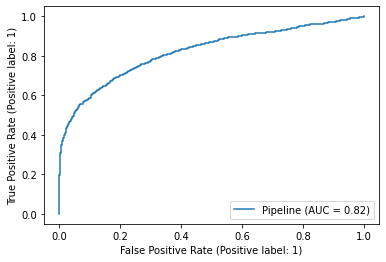

In [115]:
metrics.plot_roc_curve(lr_model, X_test, y_test) 
plt.show()

Feature: HR_mean, Score: -0.24183
Feature: O2Sat_mean, Score: 0.02345
Feature: Temp_mean, Score: 0.18527
Feature: SBP_mean, Score: 0.03515
Feature: MAP_mean, Score: -0.43554
Feature: DBP_mean, Score: -0.09040
Feature: Resp_mean, Score: 0.17676
Feature: EtCO2_mean, Score: 0.03285
Feature: BaseExcess_mean, Score: 0.12317
Feature: HCO3_mean, Score: 0.00966
Feature: FiO2_mean, Score: 0.12786
Feature: pH_mean, Score: -0.14822
Feature: PaCO2_mean, Score: -0.13318
Feature: SaO2_mean, Score: -0.07067
Feature: AST_mean, Score: 0.04305
Feature: BUN_mean, Score: 0.07894
Feature: Alkalinephos_mean, Score: -0.02535
Feature: Calcium_mean, Score: 0.10676
Feature: Chloride_mean, Score: -0.21065
Feature: Creatinine_mean, Score: 0.05312
Feature: Bilirubin_direct_mean, Score: 0.01621
Feature: Glucose_mean, Score: 0.13855
Feature: Lactate_mean, Score: -0.21434
Feature: Magnesium_mean, Score: -0.03468
Feature: Phosphate_mean, Score: -0.09248
Feature: Potassium_mean, Score: -0.22467
Feature: Bilirubin_total

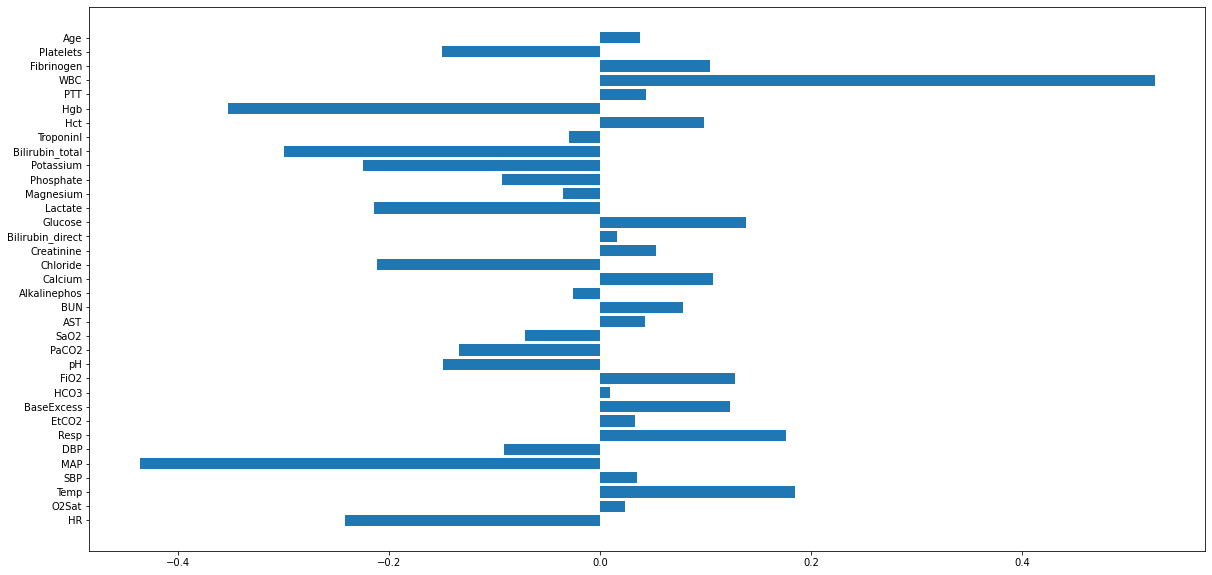

In [37]:
importance = lr_model[1].coef_[0]
names = []
values = []
import_list = []
# summarize feature importance
for i,v in enumerate(importance):
    if  i < 215:
        import_list.append([v, res[0][0].feature_names_in_[i]])
        if 'mean' in res[0][0].feature_names_in_[i]:
            names.append(res[0][0].feature_names_in_[i].replace("_mean", ""))
            values.append(v)
            print(f'Feature: %s, Score: %.5f' % (res[0][0].feature_names_in_[i],v))

# plot feature importance
plt.barh(names, values)
plt.show()

In [69]:
plt.rcParams["figure.figsize"] = (20,10)

In [40]:
import_list.sort(key=lambda x: x[0])
import_list

[[-0.4630593803925343, 'Lactate_std'],
 [-0.4355428793256213, 'MAP_mean'],
 [-0.43258470118982356, 'HCO3_min'],
 [-0.409164830977398, 'SBP_max'],
 [-0.3518733174662023, 'Hgb_mean'],
 [-0.3511738190919442, 'Resp_max'],
 [-0.34346092907748454, 'SaO2_std'],
 [-0.32609895824188784, 'Chloride_std'],
 [-0.30525053305241756, 'SaO2_min'],
 [-0.2988194112331563, 'Bilirubin_total_mean'],
 [-0.29115205425605667, 'O2Sat_std'],
 [-0.2762915100571228, 'Chloride_min'],
 [-0.25343464550278155, 'BaseExcess_min'],
 [-0.24889358729888558, 'Fibrinogen_min'],
 [-0.24182972938462544, 'HR_mean'],
 [-0.23699199330991622, 'Lactate_min'],
 [-0.22467171238102088, 'Potassium_mean'],
 [-0.2219923931817892, 'WBC_min'],
 [-0.21434484266851292, 'Lactate_mean'],
 [-0.2106493824857582, 'Chloride_mean'],
 [-0.20273893263240733, 'BaseExcess_std'],
 [-0.20271982496110563, 'WBC_max'],
 [-0.19889518193658423, 'EtCO2_min'],
 [-0.17446438749072438, 'Phosphate_std'],
 [-0.17198090125945759, 'Creatinine_max'],
 [-0.171366872168

In [47]:
pd.DataFrame(import_list[:10], columns = ['Beta coefficient', 'Feature name'])

,Beta coefficient,Feature name
0,-0.463059,Lactate_std
1,-0.435543,MAP_mean
2,-0.432585,HCO3_min
3,-0.409165,SBP_max
4,-0.351873,Hgb_mean
5,-0.351174,Resp_max
6,-0.343461,SaO2_std
7,-0.326099,Chloride_std
8,-0.305251,SaO2_min
9,-0.298819,Bilirubin_total_mean


In [49]:
pd.DataFrame(import_list[-10:], columns = ['Beta coefficient', 'Feature name'])

,Beta coefficient,Feature name
0,0.292750,Resp_min
1,0.297042,SBP_min
2,0.303026,SBP_std
3,0.341207,Phosphate_max
4,0.390242,HR_min
5,0.404037,PaCO2_max
6,0.525475,WBC_mean
7,0.581673,Chloride_max
8,0.625657,ICULOS_max
9,0.639622,Lactate_max
